In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [2]:
adultData=pd.read_csv("adult.data", header=None, na_values=[' ?'])
adultData.columns=["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Target"]

In [3]:
adultData['Target'].replace([' <=50K',' >50K'],[0,1],inplace=True)

In [4]:
categoricalColumns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [5]:
#filling missing values in categorical columns with mode
categoricalNAColumns=['workclass','occupation','native-country']
for columns in categoricalNAColumns:
    adultData[columns].fillna((mode(adultData[columns]).mode[0]), inplace=True)

C:\Users\Pramod Sripada\AppData\Local\Enthought\Canopy\User\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\Users\Pramod Sripada\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [6]:
#Encodes categorical features into numerical features using dummy encoding
for columns in categoricalColumns:
    adultData = adultData.join(pd.get_dummies(adultData[columns], prefix=columns))
    del adultData[columns]
encodedAdultData=adultData

In [7]:
numericalColumns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

In [8]:
for columns in numericalColumns:
    encodedAdultData[columns].fillna((encodedAdultData[columns].mean()),inplace=True)

In [9]:
#Transforms numerical data from existing scale to specified scale,Data transformation is required since numerical features can take various ranges and a common range is required among all the numerical features
scaler = MinMaxScaler()
for columns in numericalColumns:
    encodedAdultData[[columns]]=scaler.fit_transform(encodedAdultData[[columns]])
transformedAdultData=encodedAdultData

In [10]:
#splitting data in training data and test data
msk = np.random.rand(len(transformedAdultData)) < 0.7
trainData = transformedAdultData[msk]
testData = transformedAdultData[~msk]
targetTrain = trainData['Target']
del trainData['Target']
targetTest = testData['Target']
del testData['Target']

In [12]:
#Applying K nearest neighbors algorithm on the dataset
k = []
kROC = []
for n in range(5,20):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, trainData, targetTrain, cv=10, scoring='roc_auc')
    k.append(n)
    kROC.append(scores.mean())
    print "neighbors: ", n, "score: ", scores.mean()

neighbors:  5 score:  0.842720057188
neighbors:  6 score:  0.849759019075
neighbors:  7 score:  0.855317266534
neighbors:  8 score:  0.859458875272
neighbors:  9 score:  0.862516830255
neighbors:  10 score:  0.86447318761
neighbors:  11 score:  0.866296517139
neighbors:  12 score:  0.868216159783
neighbors:  13 score:  0.869785989704
neighbors:  14 score:  0.871087822755
neighbors:  15 score:  0.87291238695
neighbors:  16 score:  0.873838136614
neighbors:  17 score:  0.874347763951
neighbors:  18 score:  0.874808338098
neighbors:  19 score:  0.875410594384


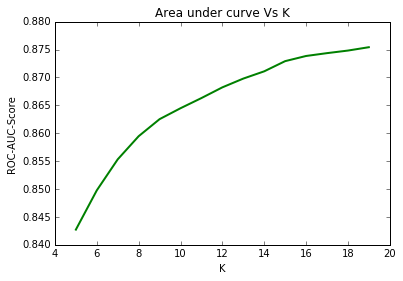

In [33]:
%matplotlib inline
#plotting ROC curve against K for K nearest neighbors
fig, ax = plt.subplots()
ax.set_title('Area under curve Vs K')
ax.set_xlim(min(k)-1, max(k)+1)
ax.legend(loc='lower right')
plt.xlabel("K")
plt.ylabel("ROC-AUC-Score")
plt.plot(k,kROC, color ='g', lw=2)
plt.show()

roc_auc_score 0.750117374425


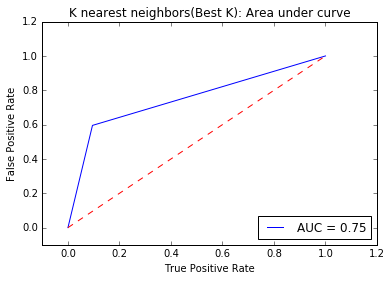

In [14]:
knnBestK = KNeighborsClassifier(n_neighbors=25)
knnBestK.fit(trainData, targetTrain)
# make predictions
expectedK = targetTest
predictedK = knnBestK.predict(testData)
# summarize the fit of the model
print "roc_auc_score", roc_auc_score(expectedK, predictedK)

false_positive_rate, true_positive_rate, thresholds = roc_curve(expectedK, predictedK)
roc_auc = auc(false_positive_rate, true_positive_rate)
fig, ax = plt.subplots()
ax.set_title('K nearest neighbors(Best K): Area under curve')
ax.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
ax.legend(loc='lower right')
ax.plot([0,1],[0,1],'r--')
ax.set_xlim([-0.1,1.2])
ax.set_ylim([-0.1,1.2])
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
plt.show()

In [17]:
#Applies decision tree algorithm on the dataset, by tuning various parameters
decisionTreeDepths = []
decisionTreeROC = []
for depth in range(3,50):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth)
    scores = cross_val_score(dt, trainData, targetTrain, cv=10, scoring='roc_auc')
    decisionTreeDepths.append(depth)
    decisionTreeROC.append(scores.mean())
    print "Depth: ", depth, "score: ", scores.mean()

Depth:  3 score:  0.860074294554
Depth:  4 score:  0.870437629075
Depth:  5 score:  0.885358120384
Depth:  6 score:  0.894769842816
Depth:  7 score:  0.89897315752
Depth:  8 score:  0.900030263636
Depth:  9 score:  0.896535569173
Depth:  10 score:  0.89182693122
Depth:  11 score:  0.885989440761
Depth:  12 score:  0.875285448499
Depth:  13 score:  0.862118244494
Depth:  14 score:  0.852600991194
Depth:  15 score:  0.843732895677
Depth:  16 score:  0.831296712048
Depth:  17 score:  0.824818841838
Depth:  18 score:  0.816067157341
Depth:  19 score:  0.806685925361
Depth:  20 score:  0.801932462861
Depth:  21 score:  0.796112606709
Depth:  22 score:  0.790564116574
Depth:  23 score:  0.787834521529
Depth:  24 score:  0.7789497929
Depth:  25 score:  0.775362450225
Depth:  26 score:  0.771383509897
Depth:  27 score:  0.768780601376
Depth:  28 score:  0.764996113415
Depth:  29 score:  0.759077689385
Depth:  30 score:  0.758196384914
Depth:  31 score:  0.7549899409
Depth:  32 score:  0.753147

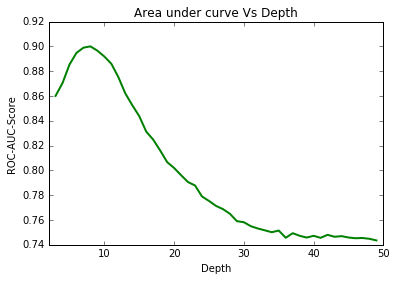

In [18]:
%matplotlib inline
#plotting ROC curve against depth for decision tree
fig, ax = plt.subplots()
ax.set_title('Area under curve Vs Depth')
ax.set_xlim(min(decisionTreeDepths)-1, max(decisionTreeDepths)+1)
ax.legend(loc='lower right')
plt.xlabel("Depth")
plt.ylabel("ROC-AUC-Score")
plt.plot(decisionTreeDepths,decisionTreeROC, color ='g', lw=2)
plt.show()

roc_auc_score 0.74983829532


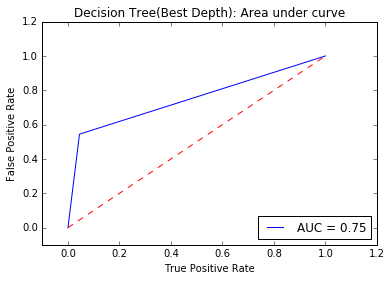

In [19]:
dtBestDepth = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8)
dtBestDepth.fit(trainData, targetTrain)
# make predictions
expectedDT = targetTest
predictedDT = dtBestDepth.predict(testData)
# summarize the fit of the model
print "roc_auc_score", roc_auc_score(expectedDT, predictedDT)

false_positive_rate, true_positive_rate, thresholds = roc_curve(expectedDT, predictedDT)
roc_auc = auc(false_positive_rate, true_positive_rate)
fig, ax = plt.subplots()
ax.set_title('Decision Tree(Best Depth): Area under curve')
ax.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
ax.legend(loc='lower right')
ax.plot([0,1],[0,1],'r--')
ax.set_xlim([-0.1,1.2])
ax.set_ylim([-0.1,1.2])
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
plt.show()

In [21]:
# Applies random forest algorithm on the dataset, by tuning various parameters
randomForestDepths = []
randomForestNEstimators = []
randomForestROC = []
#for depth in range(3,50):
for n in range(10,110,10):
    rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=14, n_estimators=n)
    scores = cross_val_score(rfc, trainData, targetTrain, cv=10, scoring='roc_auc')
    #randomForestDepths.append(depth)
    randomForestNEstimators.append(n)
    randomForestROC.append(scores.mean())
    #print "Depth: ", depth, "score: ", scores.mean()
    print "n_estimators: ", n, "score: ", scores.mean()

n_estimators:  10 score:  0.908241446697
n_estimators:  20 score:  0.911353696751
n_estimators:  30 score:  0.912706767812
n_estimators:  40 score:  0.913324464376
n_estimators:  50 score:  0.912776350785
n_estimators:  60 score:  0.913465637954
n_estimators:  70 score:  0.912944195245
n_estimators:  80 score:  0.913823228942
n_estimators:  90 score:  0.913240484165
n_estimators:  100 score:  0.913512501451


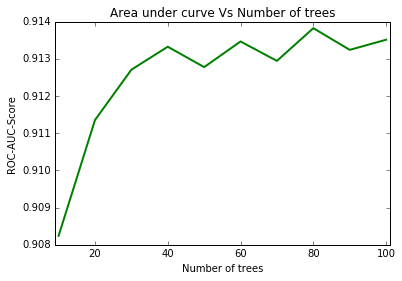

In [32]:
#plotting ROC curve against depth for random forest
fig, ax = plt.subplots()
ax.set_title('Area under curve Vs Number of trees')
ax.set_xlim(min(randomForestNEstimators)-1, max(randomForestNEstimators)+1)
ax.legend(loc='lower right')
plt.xlabel("Number of trees")
plt.ylabel("ROC-AUC-Score")
plt.plot(randomForestNEstimators,randomForestROC, color ='g', lw=2)
plt.show()

roc_auc_score 0.762721332995


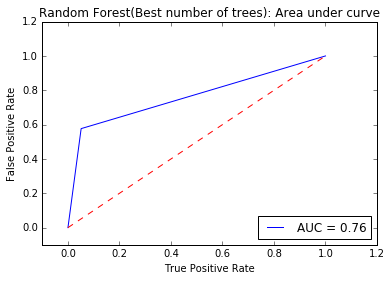

In [23]:
rfcBestDepth = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=14, n_estimators=80)
rfcBestDepth.fit(trainData, targetTrain)
# make predictions
expectedRF = targetTest
predictedRF = rfcBestDepth.predict(testData)
# summarize the fit of the model
print "roc_auc_score", roc_auc_score(expectedRF, predictedRF)

false_positive_rate, true_positive_rate, thresholds = roc_curve(expectedRF, predictedRF)
roc_auc = auc(false_positive_rate, true_positive_rate)
fig, ax = plt.subplots()
ax.set_title('Random Forest(Best number of trees): Area under curve')
ax.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
ax.legend(loc='lower right')
ax.plot([0,1],[0,1],'r--')
ax.set_xlim([-0.1,1.2])
ax.set_ylim([-0.1,1.2])
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
plt.show()

In [24]:
#Applies support vector machine algorithm on the dataset, by tuning various parameters
svmC = [0.01, 0.1, 1, 10]
svmROC = []
for c in svmC:
    svm = SVC(C=c, cache_size=200, kernel='linear')
    scores = cross_val_score(svm, trainData, targetTrain, cv=10, scoring='roc_auc')
    svmROC.append(scores.mean())
    print "C: ", c, "score: ", scores.mean()

C:  0.01 score:  0.877537256534
C:  0.1 score:  0.891414597338
C:  1 score:  0.900035485142
C:  10 score:  0.900424804786


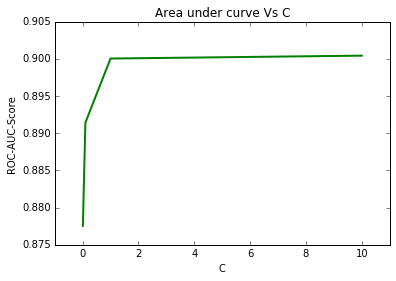

In [27]:
#plotting ROC curve against C for SVM
fig, ax = plt.subplots()
ax.set_title('Area under curve Vs C')
ax.set_xlim(min(svmC)-1, max(svmC)+1)
ax.legend(loc='lower right')
plt.xlabel("C")
plt.ylabel("ROC-AUC-Score")
plt.plot(svmC,svmROC, color ='g', lw=2)
plt.show()

roc_auc_score 0.757934337123


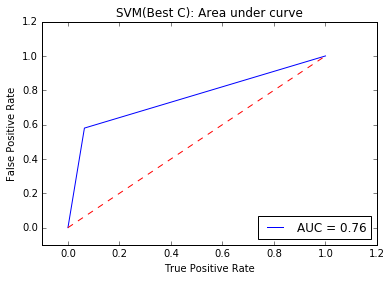

In [28]:
svmBestC = SVC(C=10, cache_size=200, kernel='linear')
svmBestC.fit(trainData,targetTrain)
# make predictions
expectedSVM = targetTest
predictedSVM = svmBestC.predict(testData)
# summarize the fit of the model
print "roc_auc_score", roc_auc_score(expectedSVM, predictedSVM)

false_positive_rate, true_positive_rate, thresholds = roc_curve(expectedSVM, predictedSVM)
roc_auc = auc(false_positive_rate, true_positive_rate)
fig, ax = plt.subplots()
ax.set_title('SVM(Best C): Area under curve')
ax.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
ax.legend(loc='lower right')
ax.plot([0,1],[0,1],'r--')
ax.set_xlim([-0.1,1.2])
ax.set_ylim([-0.1,1.2])
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
plt.show()

In [29]:
adaboostBaseEstimator = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=5)
adaNumEstimators = []
adaROC = []
for estimators in range (10,100,10):
    adaclf = AdaBoostClassifier(base_estimator = adaboostBaseEstimator, n_estimators=estimators)
    scores = cross_val_score(adaclf, trainData, targetTrain, cv=10, scoring='roc_auc')
    adaNumEstimators.append(estimators)
    adaROC.append(scores.mean())
    print "Num estimators: ", estimators, "ROC-AUC-Score: ", scores.mean()

Num estimators:  10 ROC-AUC-Score:  0.911984200087
Num estimators:  20 ROC-AUC-Score:  0.903451247954
Num estimators:  30 ROC-AUC-Score:  0.898366275936
Num estimators:  40 ROC-AUC-Score:  0.89416238217
Num estimators:  50 ROC-AUC-Score:  0.887878315462
Num estimators:  60 ROC-AUC-Score:  0.882000452875
Num estimators:  70 ROC-AUC-Score:  0.875639750158
Num estimators:  80 ROC-AUC-Score:  0.874155634587
Num estimators:  90 ROC-AUC-Score:  0.869306701791


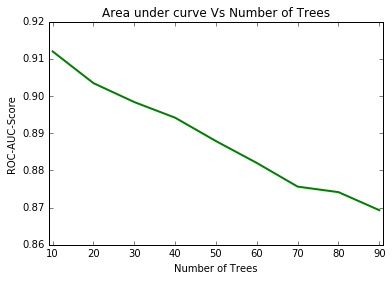

In [30]:
#plotting ROC curve against Number of Trees for adaboost
fig, ax = plt.subplots()
ax.set_title('Area under curve Vs Number of Trees')
ax.set_xlim(min(adaNumEstimators)-1, max(adaNumEstimators)+1)
plt.xlabel("Number of Trees")
plt.ylabel("ROC-AUC-Score")
plt.plot(adaNumEstimators,adaROC, color ='g', lw=2)
plt.show()

roc_auc_score 0.797750783


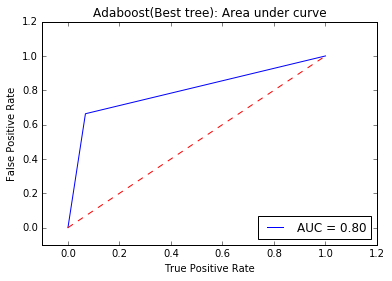

In [31]:
baseDecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_leaf=5)
bestAdaboost = AdaBoostClassifier(base_estimator = baseDecisionTree, n_estimators=10)
bestAdaboost.fit(trainData, targetTrain)
expectedAB = targetTest
predictedAB = bestAdaboost.predict(testData)
print "roc_auc_score", roc_auc_score(expectedAB, predictedAB)

false_positive_rate, true_positive_rate, thresholds = roc_curve(expectedAB, predictedAB)
roc_auc = auc(false_positive_rate, true_positive_rate)
fig, ax = plt.subplots()
ax.set_title('Adaboost(Best tree): Area under curve')
ax.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
ax.legend(loc='lower right')
ax.plot([0,1],[0,1],'r--')
ax.set_xlim([-0.1,1.2])
ax.set_ylim([-0.1,1.2])
ax.set_xlabel('True Positive Rate')
ax.set_ylabel('False Positive Rate')
plt.show()